In [30]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [163]:
data3=xr.open_dataset("SI_non_dim.nc")

In [164]:
S2 = 0.4225
gamma = 0.8 #0.5*(1+(1+2)**(-1))
omega1 = data3.growth_rate.isel(delta=0,N=0,gamma_index=0) #np.linspace(0,1.6,41)#np.arange(0,1.5,0.01)

##### S2

In [165]:
omega1

<xarray.DataArray 'growth_rate' (t: 1, k: 41)>
[41 values with dtype=float64]
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39 40
  * t            (t) int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0

In [166]:
def theta(omega):
    top = -1*(1+omega**2)*(1-gamma)+gamma*S2
    bottom = 1+omega**2
    return -1*(top/bottom)**(0.5)

In [167]:
def k(omega):
    t = theta(omega)
    tp = (1+S2+omega**2)*(np.arctan(t)+np.pi)
    bttm = S2*(-1*(1+omega**2)*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [168]:
def k_shift(omega,q):
    tp = (1+S2+np.power(omega,2))*(q)
    bttm = S2*(-1*(1+np.power(omega,2))*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [169]:
def w_max():
    return (gamma*S2/(1-gamma)-1)**(0.5)

In [170]:
k_list = k(omega1)

In [171]:
theta(omega1)

<xarray.DataArray 'growth_rate' (t: 1, k: 41)>
array([[-0.37148351, -0.37148351, -0.37148351, -0.36545235, -0.30829691,
        -0.26625328, -0.23392282, -0.20828068, -0.18746668, -0.17025966,
        -0.15581903, -0.14354505, -0.13299777, -0.12384705, -0.11584045,
        -0.10878185, -0.1025167 , -0.09692172, -0.09189744, -0.08736283,
        -0.08325124, -0.07950741, -0.07608515, -0.07294559, -0.0700558 ,
        -0.06738771, -0.06491723, -0.06262364, -0.06048895, -0.05849751,
        -0.05663567, -0.05489139, -0.05325412, -0.05171449, -0.05026419,
        -0.04889582, -0.04760278, -0.04637914, -0.04521958, -0.0441193 ,
        -0.04307398]])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39 40
  * t            (t) int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0

In [172]:
omega1[0,:]

<xarray.DataArray 'growth_rate' (k: 41)>
array([3.880427e-17, 1.777053e-15, 1.891546e-15, 1.154334e-01, 3.815498e-01,
       4.977301e-01, 5.717935e-01, 6.235142e-01, 6.613763e-01, 6.899693e-01,
       7.120728e-01, 7.294854e-01, 7.434232e-01, 7.547349e-01, 7.640281e-01,
       7.717466e-01, 7.782204e-01, 7.836985e-01, 7.883716e-01, 7.923875e-01,
       7.958621e-01, 7.988871e-01, 8.015357e-01, 8.038671e-01, 8.059294e-01,
       8.077621e-01, 8.093976e-01, 8.108630e-01, 8.121808e-01, 8.133701e-01,
       8.144468e-01, 8.154247e-01, 8.163154e-01, 8.171289e-01, 8.178738e-01,
       8.185575e-01, 8.191866e-01, 8.197666e-01, 8.203025e-01, 8.207987e-01,
       8.212589e-01])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39 40
    t            int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0

In [173]:
k_list[0,:]

<xarray.DataArray 'growth_rate' (k: 41)>
array([ 16.41217813,  16.41217813,  16.41217813,  16.76011012,
        20.78163951,  24.89476694,  29.08371819,  33.33483979,
        37.63656409,  41.9792447 ,  46.35491729,  50.75703758,
        55.18023124,  59.62007306,  64.07290104,  68.53566443,
        73.00580154,  77.48114272,  81.95983351,  86.44027402,
        90.921071  ,  95.40099991,  99.87897475, 104.35402406,
       108.82527162, 113.29192098, 117.7532429 , 122.2085652 ,
       126.6572644 , 131.09875892, 135.53250348, 139.95798439,
       144.37471575, 148.78223618, 153.18010614, 157.56790563,
       161.9452323 , 166.31169981, 170.66693645, 175.01058395,
       179.34229652])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39 40
    t            int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0

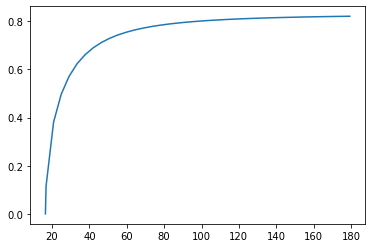

In [174]:
plt.plot(k_list[0,:],omega1[0,:])
# plt.xticks(np.arange(8,32,1))
plt.show()

In [175]:
# data3.growth_rate.isel(delta=0,N=0,t=0,gamma_index=0).values
data3

<xarray.Dataset>
Dimensions:      (k: 41, t: 1, N: 1, delta: 1, gamma_index: 1)
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39 40
  * t            (t) int32 0
  * N            (N) float64 0.003162
  * delta        (delta) int32 0
  * gamma_index  (gamma_index) float64 0.0
Data variables:
    growth_rate  (t, N, delta, gamma_index, k) float64 ...
    gamma        (t, N, delta, gamma_index, k) float64 ...

Text(0, 0.5, 'Growth Rate')

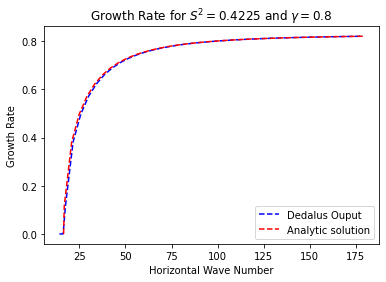

In [185]:
shft = 2.4#4*np.pi/6
k_m = data3.k[:]+k_shift(data3.growth_rate.isel(delta=0,N=0,gamma_index=0),shft)[:]
plt.plot(k_m[:],data3.growth_rate.isel(t=0,N=0,delta=0,gamma_index=0)[:],color="b",linestyle="dashed",label="Dedalus Ouput")
plt.plot(k_list[0,:],omega1[0,:],linestyle="dashed",c="r", label="Analytic solution")
# plt.hlines(w_max(),xmin=np.min([np.array([k_list[0]]),k_m.values[0]]),xmax=np.max([np.array([k_list[-1]]),k_m.values[-1]]),linestyles="dotted",color="k",label="Upper Limit of Analytical Solution")
plt.legend(loc="lower right")
plt.title(f"Growth Rate for $S^2=${S2} and $\gamma=${gamma}")
plt.xlabel("Horizontal Wave Number")
plt.ylabel("Growth Rate")

In [187]:
diff = (k_list[0,:]-data3.k[:])
omg = data3.growth_rate.isel(delta=0,N=0,gamma_index=0)
top= (1+S2+np.power(omg,2))
bttm = S2*(-1*(1+np.power(omg,2))*(1-gamma)+gamma*S2)
diff*(bttm)**(0.5)/top

<xarray.DataArray (k: 41, t: 1)>
array([[2.78590849],
       [2.61616207],
       [2.44641565],
       [2.29160049],
       [2.29541595],
       [2.30266501],
       [2.31109415],
       [2.31966357],
       [2.32789288],
       [2.33557442],
       [2.34263697],
       [2.34907742],
       [2.35492541],
       [2.36022474],
       [2.36502369],
       [2.36937006],
       [2.37330872],
       [2.37688066],
       [2.38012271],
       [2.38306761],
...
       [2.38817855],
       [2.39039274],
       [2.39240683],
       [2.39423837],
       [2.3959029 ],
       [2.39741417],
       [2.39878439],
       [2.4000244 ],
       [2.4011439 ],
       [2.40215154],
       [2.40305507],
       [2.40386144],
       [2.40457693],
       [2.40520719],
       [2.40575732],
       [2.40623197],
       [2.40663535],
       [2.40697128],
       [2.40724326],
       [2.40745448]])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39 40
  * t            (t) int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0

In [161]:
2*np.pi/3

2.0943951023931953

In [114]:
k_shift(data3.growth_rate.isel(delta=0,N=0,gamma_index=0),shft)[:]

<xarray.DataArray 'growth_rate' (t: 1, k: 41)>
array([[ 8.65814234,  8.65814234,  8.65814234, 10.33982945, 12.33129032,
        14.33169153, 16.3407653 , 18.35820246, 20.38366013, 22.41676948,
        24.45714325, 26.50438295, 28.55808518, 30.61784724, 32.68327182,
        34.75397081, 36.82956823, 38.90970248, 40.99402779, 43.08221523,
        45.17395314, 47.26894723, 49.36692033, 51.46761199, 53.57077782,
        55.6761888 , 57.78363045, 59.89290204, 62.00381565, 64.11619542,
        66.22987666, 68.34470508, 70.46053602, 72.57723371, 74.69467064,
        76.81272688, 78.93128955, 81.05025219, 83.16951434, 85.28898102,
        87.40856233]])
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39 40
  * t            (t) int32 0
    N            float64 0.003162
    delta        int32 0
    gamma_index  float64 0.0

In [72]:
data4=xr.open_dataset("PSI_non_dim_full_form_pi_2.nc")

Text(0, 0.5, 'Growth Rate')

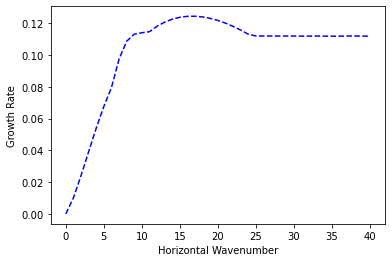

In [29]:
k_m = data4.k[:]
plt.plot(k_m[:],data4.growth_rate.isel(delta=0,N=0,gamma_index=0)[:],color="b",linestyle="dashed",label="Dedalus Ouput")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")

In [21]:
data5=xr.open_dataset("PSI_non_dim_field.nc")

In [22]:
data5

<xarray.Dataset>
Dimensions:      (k: 101, z: 64)
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 92 93 94 95 96 97 98 99 100
  * z            (z) float64 0.0001506 0.001355 0.00376 ... 0.9962 0.9986 0.9998
Data variables:
    v_structure  (k, z) float64 ...

Text(0.5, 0, 'v-velocity')

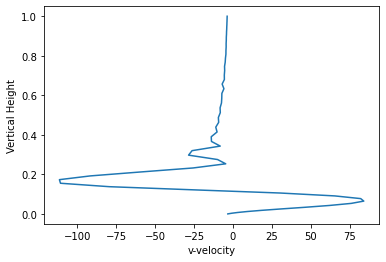

In [23]:
plt.plot(data5.v_structure.sel(k=40)/data5.v_structure.sel(k=14).max(),data5.z)
plt.ylabel("Vertical Height")
plt.xlabel("v-velocity")